In [2]:
from fastai.tabular import *
from scipy.io.arff import loadarff
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
import os
import sys
import glob
import pprint
from sklearn.utils import shuffle
p = pprint.PrettyPrinter(indent=4, width=30)
pretty = p.pprint

print('libraries loaded')

libraries loaded


In [3]:
def loadData(csvFile):
    pickleDump = '{}.pickle'.format(csvFile)
    if os.path.exists(pickleDump):
        df = pd.read_pickle(pickleDump)
    else:
        df = pd.read_csv(csvFile, low_memory=False)
        # clean data
        # Note: there's a leading space for each column name except for the first one
        # let's strip the whitspaces from column names
        df = df.rename(str.strip, axis='columns')
        df.drop(columns=['Source IP', 'Destination IP'], inplace=True)
        # drop missing values/NaN etc.
        df.dropna(inplace=True)
        # drop Infinity rows and NaN string from each column
        # Search through dataframe for any Infinite or NaN values in various forms that were not picked up previously
        for col in ndf.columns:
            indexNames = ndf[ndf[col] == np.inf].index
            if not indexNames.empty:
                print('deleting {} rows with Infinity in column {}'.format(len(indexNames), col))
                ndf.drop(indexNames, inplace=True)

            indexNames = ndf[ndf[col] == np.nan].index
            if not indexNames.empty:
                print('deleting {} rows with Infinity in column {}'.format(len(indexNames), col))
                ndf.drop(indexNames, inplace=True)

            indexNames = ndf[ndf[col]=='Infinity'].index
            if not indexNames.empty:
                print('deleting {} rows with Infinity in column {}'.format(len(indexNames), col))
                ndf.drop(indexNames, inplace=True)

            indexNames = ndf[ndf[col]=='inf'].index
            if not indexNames.empty:
                print('deleting {} rows with inf in column {}'.format(len(indexNames), col))
                ndf.drop(indexNames, inplace=True)

            indexNames = ndf[ndf[col]=='NaN'].index
            if not indexNames.empty:
                print('deleting {} rows with NaN in column {}'.format(len(indexNames), col))
                ndf.drop(indexNames, inplace=True)

            indexNames = ndf[ndf[col]=='nan'].index
            if not indexNames.empty:
                print('deleting {} rows with nan in column {}'.format(len(indexNames), col))
                ndf.drop(indexNames, inplace=True)
        # convert  Flow Bytes/s object & Flow Packets/s object into float type
        df['Flow Bytes/s'] = df['Flow Bytes/s'].astype('float64')
        df['Flow Packets/s'] = df['Flow Packets/s'].astype('float64')
        print(df.tail())
        df.to_pickle(pickleDump)
    
    return df

In [4]:

print('relevant libraries uploaded')

# Choose your own filepath for arff file
filepath = 'CICDataSet-TOR/Scenario-A/TimeBasedFeatures-15s-TOR-NonTOR-85.arff'
raw_data = loadarff(filepath)

# Converting arff file into pandas dataframe
df_data = pd.DataFrame(raw_data[0])

# Now, you can perform pandas methods if it is easy enough for you
print(df_data['class1'].value_counts())
column_name = list(df_data.columns)
print(column_name)
    
dataPath = 'CICDataSet-TOR/Scenario-A'
csvFile = os.path.join(dataPath, 'merged_5s.csv')
df = loadData(csvFile)

relevant libraries uploaded
b'NONTOR'    15962
b'TOR'        2799
Name: class1, dtype: int64
['duration', 'total_fiat', 'total_biat', 'min_fiat', 'min_biat', 'max_fiat', 'max_biat', 'mean_fiat', 'mean_biat', 'flowPktsPerSecond', 'flowBytesPerSecond', 'min_flowiat', 'max_flowiat', 'mean_flowiat', 'std_flowiat', 'min_active', 'mean_active', 'max_active', 'std_active', 'min_idle', 'mean_idle', 'max_idle', 'std_idle', 'class1']


In [7]:
df_data

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1
0,9368711.0,16.0,4.0,1564818.0,1549373.0,1.902053e+05,2.032905e+05,3.898224e+05,3.703237e+05,10.353612,...,2.676002e+05,1871488.0,1.983656e+06,2195089.0,1.832197e+05,1234883.0,1420565.0,1523088.0,1.610965e+05,b'NONTOR'
1,7340238.0,18.0,4.0,1567554.0,1527893.0,1.656870e+05,1.869148e+05,3.172675e+05,3.043707e+05,11.580006,...,2.214629e+05,1491627.0,3.572433e+06,5653239.0,2.942704e+06,1131498.0,1324636.0,1517774.0,2.731384e+05,b'NONTOR'
2,4644225.0,29.0,15.0,1270547.0,1079974.0,1.658652e+05,1.953021e+05,3.294731e+05,3.004926e+05,11.412022,...,2.174754e+05,1758922.0,1.758922e+06,1758922.0,0.000000e+00,1079974.0,1079974.0,1079974.0,0.000000e+00,b'NONTOR'
3,4978735.0,19.0,8.0,2492050.0,2457286.0,2.395432e+05,2.765964e+05,6.124353e+05,6.283396e+05,8.034169,...,4.369597e+05,1710925.0,2.382905e+06,3054885.0,9.503232e+05,1346073.0,1894031.5,2441990.0,7.749303e+05,b'NONTOR'
4,11838189.0,19.0,10.0,3094089.0,3093543.0,2.437665e+05,2.959547e+05,5.997218e+05,6.256327e+05,7.602514,...,4.361296e+05,1747431.0,2.400446e+06,3240696.0,6.232744e+05,1394455.0,1983227.0,3042717.0,7.259878e+05,b'NONTOR'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18756,13932812.0,13932390.0,13932812.0,93.0,244.0,8.119562e+06,8.081967e+06,3.240091e+05,2.843431e+05,6.746664,...,8.490494e+05,1506874.0,6.966222e+06,12425570.0,7.720684e+06,1469335.0,4775651.0,8081967.0,4.675837e+06,b'TOR'
18757,14999975.0,14999975.0,14961989.0,0.0,7.0,1.624147e+06,1.624060e+06,2.103783e+04,2.939487e+04,81.600136,...,7.020772e+04,3249302.0,3.525820e+06,3802338.0,3.910555e+05,1288308.0,1456115.5,1623923.0,2.373156e+05,b'TOR'
18758,14660517.0,14660517.0,14618019.0,333.0,613.0,7.663754e+06,7.663955e+06,1.628946e+06,1.827252e+06,1.295998,...,2.116241e+06,6381394.0,7.023854e+06,7666315.0,9.085764e+05,5314745.0,6489046.0,7663347.0,1.660712e+06,b'TOR'
18759,14832948.0,14832905.0,14792242.0,7.0,12.0,7.884760e+05,8.250180e+05,4.324462e+04,4.350659e+04,46.180975,...,6.915061e+04,-1.0,0.000000e+00,-1.0,0.000000e+00,-1.0,0.0,-1.0,0.000000e+00,b'TOR'


In [8]:
# total Tor samples
df_data['class1'].value_counts()
df_data.dtypes

duration              float64
total_fiat            float64
total_biat            float64
min_fiat              float64
min_biat              float64
max_fiat              float64
max_biat              float64
mean_fiat             float64
mean_biat             float64
flowPktsPerSecond     float64
flowBytesPerSecond    float64
min_flowiat           float64
max_flowiat           float64
mean_flowiat          float64
std_flowiat           float64
min_active            float64
mean_active           float64
max_active            float64
std_active            float64
min_idle              float64
mean_idle             float64
max_idle              float64
std_idle              float64
class1                 object
dtype: object

In [9]:
df_dep_var = 'class1'
#df_cat_names = ['duration', 'total_fiat', 'total_biat']
cont_names = list(set(df_data.columns) - set([df_dep_var]))

In [10]:
cont_names

['max_flowiat',
 'min_active',
 'total_fiat',
 'mean_fiat',
 'min_fiat',
 'mean_biat',
 'mean_active',
 'max_biat',
 'std_active',
 'duration',
 'total_biat',
 'mean_idle',
 'min_idle',
 'std_flowiat',
 'max_fiat',
 'max_idle',
 'min_biat',
 'max_active',
 'min_flowiat',
 'flowPktsPerSecond',
 'flowBytesPerSecond',
 'mean_flowiat',
 'std_idle']

In [11]:
procs = [FillMissing, Categorify, Normalize]
sss = StratifiedShuffleSplit(n_splits = 2, test_size=0.2, random_state=0)
print(sss)

StratifiedShuffleSplit(n_splits=2, random_state=0, test_size=0.2,
            train_size=None)


epoch,train_loss,valid_loss,accuracy,time
0,0.573013,0.495410,0.090661,00:02
1,0.081129,0.031677,0.114109,00:02
2,0.008202,0.010671,0.168332,00:02
3,0.004357,0.008957,0.249667,00:02
4,0.002027,0.014216,0.804690,00:02
5,0.002322,0.006741,0.624301,00:02
6,0.001937,0.008903,0.596856,00:02
7,0.001745,0.010622,0.618372,00:02
8,0.001335,0.006776,0.633160,00:02
9,0.001237,0.009125,0.624967,00:02


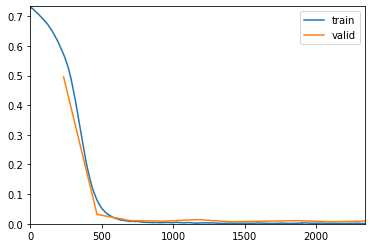

epoch,train_loss,valid_loss,accuracy,time
0,0.585696,0.522375,0.000999,00:02
1,0.082276,0.034014,0.005329,00:02
2,0.009995,0.008892,0.010125,00:02
3,0.004976,0.007351,0.002598,00:02
4,0.003340,0.004140,0.014189,00:02
5,0.003014,0.006153,0.094724,00:02
6,0.003004,0.009833,0.010925,00:02
7,0.002831,0.007064,0.005596,00:02
8,0.001762,0.006905,0.002931,00:02
9,0.001773,0.005099,0.003997,00:02


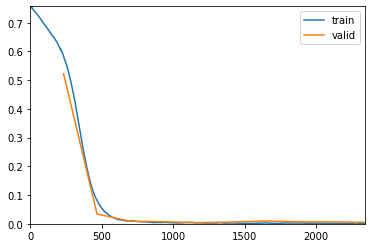

In [14]:
for train_idx, test_idx in sss.split(df_data.index, df_data[df_dep_var]):
    data_fold = (TabularList.from_df(df_data, path=dataPath, cont_names=cont_names, procs=procs)
                     .split_by_idxs(train_idx, test_idx)
                     .label_from_df(cols=df_dep_var)
                     .databunch())
    # create model and learn
    model = tabular_learner(data_fold, layers=[50, 20], metrics=accuracy, callback_fns=ShowGraph)
    model.fit_one_cycle(cyc_len=10) #
    model.save('{}.model'.format(os.path.basename(filepath)))

In [15]:
loss, acc = model.validate()
print('loss {}: accuracy: {:.2f}%'.format(loss, acc*100))

loss 0.005099128000438213: accuracy: 0.40%


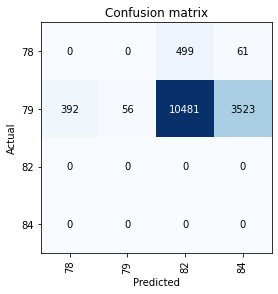

In [16]:
preds, y, losses = model.get_preds(with_loss=True)
interp = ClassificationInterpretation(model, preds, y, losses)
interp.plot_confusion_matrix()

In [17]:
# Choose your own filepath for arff file
filepath = 'CICDataSet-TOR/Scenario-A/TimeBasedFeatures-15s-TOR-NonTOR.arff'
raw_data = loadarff(filepath)

# Converting arff file into pandas dataframe
df_data = pd.DataFrame(raw_data[0])

# Now, you can perform pandas methods if it is easy enough for you
print(df_data['class1'].value_counts())
column_name = list(df_data.columns)
print(column_name)

b'NONTOR'    18758
b'TOR'        3314
Name: class1, dtype: int64
['duration', 'total_fiat', 'total_biat', 'min_fiat', 'min_biat', 'max_fiat', 'max_biat', 'mean_fiat', 'mean_biat', 'flowPktsPerSecond', 'flowBytesPerSecond', 'min_flowiat', 'max_flowiat', 'mean_flowiat', 'std_flowiat', 'min_active', 'mean_active', 'max_active', 'std_active', 'min_idle', 'mean_idle', 'max_idle', 'std_idle', 'class1']


In [18]:
df_data

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1
0,9368711.0,16.0,4.0,1564818.0,1549373.0,1.902053e+05,2.032905e+05,3.898224e+05,3.703237e+05,10.353612,...,2.676002e+05,1871488.0,1.983656e+06,2195089.0,1.832197e+05,1234883.0,1420565.0,1523088.0,1.610965e+05,b'NONTOR'
1,7340238.0,18.0,4.0,1567554.0,1527893.0,1.656870e+05,1.869148e+05,3.172675e+05,3.043707e+05,11.580006,...,2.214629e+05,1491627.0,3.572433e+06,5653239.0,2.942704e+06,1131498.0,1324636.0,1517774.0,2.731384e+05,b'NONTOR'
2,4644225.0,29.0,15.0,1270547.0,1079974.0,1.658652e+05,1.953021e+05,3.294731e+05,3.004926e+05,11.412022,...,2.174754e+05,1758922.0,1.758922e+06,1758922.0,0.000000e+00,1079974.0,1079974.0,1079974.0,0.000000e+00,b'NONTOR'
3,4978735.0,19.0,8.0,2492050.0,2457286.0,2.395432e+05,2.765964e+05,6.124353e+05,6.283396e+05,8.034169,...,4.369597e+05,1710925.0,2.382905e+06,3054885.0,9.503232e+05,1346073.0,1894031.5,2441990.0,7.749303e+05,b'NONTOR'
4,11838189.0,19.0,10.0,3094089.0,3093543.0,2.437665e+05,2.959547e+05,5.997218e+05,6.256327e+05,7.602514,...,4.361296e+05,1747431.0,2.400446e+06,3240696.0,6.232744e+05,1394455.0,1983227.0,3042717.0,7.259878e+05,b'NONTOR'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22067,13932812.0,13932390.0,13932812.0,93.0,244.0,8.119562e+06,8.081967e+06,3.240091e+05,2.843431e+05,6.746664,...,8.490494e+05,1506874.0,6.966222e+06,12425570.0,7.720684e+06,1469335.0,4775651.0,8081967.0,4.675837e+06,b'TOR'
22068,14999975.0,14999975.0,14961989.0,0.0,7.0,1.624147e+06,1.624060e+06,2.103783e+04,2.939487e+04,81.600136,...,7.020772e+04,3249302.0,3.525820e+06,3802338.0,3.910555e+05,1288308.0,1456115.5,1623923.0,2.373156e+05,b'TOR'
22069,14660517.0,14660517.0,14618019.0,333.0,613.0,7.663754e+06,7.663955e+06,1.628946e+06,1.827252e+06,1.295998,...,2.116241e+06,6381394.0,7.023854e+06,7666315.0,9.085764e+05,5314745.0,6489046.0,7663347.0,1.660712e+06,b'TOR'
22070,14832948.0,14832905.0,14792242.0,7.0,12.0,7.884760e+05,8.250180e+05,4.324462e+04,4.350659e+04,46.180975,...,6.915061e+04,-1.0,0.000000e+00,-1.0,0.000000e+00,-1.0,0.0,-1.0,0.000000e+00,b'TOR'


In [19]:
# total Tor samples
df_data['class1'].value_counts()
df_data.dtypes

duration              float64
total_fiat            float64
total_biat            float64
min_fiat              float64
min_biat              float64
max_fiat              float64
max_biat              float64
mean_fiat             float64
mean_biat             float64
flowPktsPerSecond     float64
flowBytesPerSecond    float64
min_flowiat           float64
max_flowiat           float64
mean_flowiat          float64
std_flowiat           float64
min_active            float64
mean_active           float64
max_active            float64
std_active            float64
min_idle              float64
mean_idle             float64
max_idle              float64
std_idle              float64
class1                 object
dtype: object

epoch,train_loss,valid_loss,accuracy,time
0,0.511594,0.438564,0.176557,00:03
1,0.050008,0.021440,0.498188,00:04
2,0.007633,0.010879,0.763250,00:02
3,0.003773,0.013560,0.409230,00:02
4,0.002505,0.009208,0.639468,00:03
5,0.002149,0.008286,0.317497,00:02
6,0.001815,0.014569,0.249660,00:02
7,0.001926,0.017675,0.171518,00:02
8,0.002358,0.029697,0.171008,00:02
9,0.001670,0.018331,0.170045,00:02


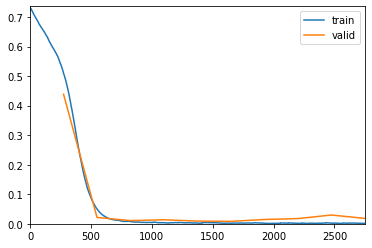

epoch,train_loss,valid_loss,accuracy,time
0,0.568283,0.473926,0.002945,00:02
1,0.049114,0.022020,0.000849,00:02
2,0.008079,0.007116,0.093545,00:02
3,0.004087,0.005068,0.334202,00:02
4,0.001985,0.009121,0.543828,00:02
5,0.002364,0.009198,0.477633,00:02
6,0.001762,0.006718,0.417780,00:02
7,0.001853,0.014650,0.129615,00:02
8,0.001389,0.006703,0.109173,00:02
9,0.001273,0.012138,0.134541,00:02


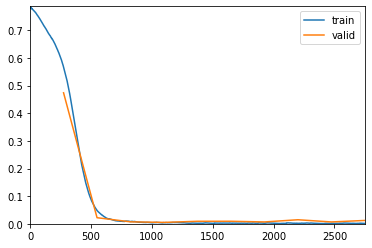

In [25]:
for train_idx, test_idx in sss.split(df_data.index, df_data[df_dep_var]):
    data_fold = (TabularList.from_df(df_data, path=dataPath, cont_names=cont_names, procs=procs)
                     .split_by_idxs(train_idx, test_idx)
                     .label_from_df(cols=df_dep_var)
                     .databunch())
    # create model and learn
    model = tabular_learner(data_fold, layers=[50, 20], metrics=accuracy, callback_fns=ShowGraph)
    model.fit_one_cycle(cyc_len=10) #
    model.save('{}.model'.format(os.path.basename(filepath)))

In [26]:
loss, acc = model.validate()
print('loss {}: accuracy: {:.2f}%'.format(loss, acc*100))

loss 0.012137935496866703: accuracy: 13.45%


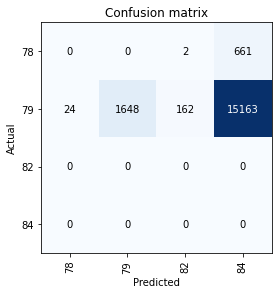

In [27]:
preds, y, losses = model.get_preds(with_loss=True)
interp = ClassificationInterpretation(model, preds, y, losses)
interp.plot_confusion_matrix()

In [28]:
# Choose your own filepath for arff file
filepath = 'CICDataSet-TOR/Scenario-A/TimeBasedFeatures-30s-TORNonTOR.arff'
raw_data = loadarff(filepath)

# Converting arff file into pandas dataframe
df_data = pd.DataFrame(raw_data[0])

# Now, you can perform pandas methods if it is easy enough for you
print(df_data['class1'].value_counts())
column_name = list(df_data.columns)
print(column_name)

b'NONTOR'    14651
b'TOR'        1771
Name: class1, dtype: int64
['duration', 'total_fiat', 'total_biat', 'min_fiat', 'min_biat', 'max_fiat', 'max_biat', 'mean_fiat', 'mean_biat', 'flowPktsPerSecond', 'flowBytesPerSecond', 'min_flowiat', 'max_flowiat', 'mean_flowiat', 'std_flowiat', 'min_active', 'mean_active', 'max_active', 'std_active', 'min_idle', 'mean_idle', 'max_idle', 'std_idle', 'class1']


In [29]:
df_data

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1
0,22930417.0,18.0,4.0,10995965.0,10960941.0,314115.301370,360993.158730,1.306745e+06,1.389355e+06,6.018207,...,952994.511204,1491627.0,5.011278e+06,11141326.0,4.507600e+06,1079974.0,3.668800e+06,10945954.0,4.855368e+06,b'NONTOR'
1,25199304.0,16.0,4.0,11037969.0,10851858.0,359269.900000,387414.676923,1.373362e+06,1.392885e+06,5.436658,...,976395.388090,1710925.0,4.164396e+06,14269600.0,4.973926e+06,1234883.0,3.150269e+06,10851858.0,3.797336e+06,b'NONTOR'
2,29772995.0,17.0,7.0,4093396.0,3956161.0,261815.256637,310135.364583,6.445422e+05,6.512717e+05,7.086959,...,462297.947930,1363299.0,2.706523e+06,6192566.0,1.445372e+06,1147658.0,1.955468e+06,3956161.0,8.938483e+05,b'NONTOR'
3,29609149.0,22.0,6.0,3954677.0,3943698.0,271180.963303,287136.446602,6.685474e+05,6.590460e+05,7.227496,...,472527.270988,1443143.0,2.937555e+06,4176130.0,8.769669e+05,1065834.0,2.022585e+06,3895269.0,9.303813e+05,b'NONTOR'
4,7863522.0,30.0,8.0,2067690.0,2068091.0,244213.125000,252051.483871,5.718062e+05,5.628123e+05,8.266016,...,400581.170736,2092947.0,2.535199e+06,3282729.0,6.509928e+05,1707343.0,1.897912e+06,2017289.0,1.667869e+05,b'NONTOR'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16417,29998412.0,29998217.0,29998158.0,217.0,224.0,76011.000000,76072.000000,4.552081e+04,3.802048e+04,48.335892,...,23527.102499,-1.0,0.000000e+00,-1.0,0.000000e+00,-1.0,0.000000e+00,-1.0,0.000000e+00,b'TOR'
16418,29989260.0,29949865.0,29989260.0,80.0,18.0,77101.000000,74790.000000,4.544744e+04,3.706954e+04,49.017548,...,23390.079904,-1.0,0.000000e+00,-1.0,0.000000e+00,-1.0,0.000000e+00,-1.0,0.000000e+00,b'TOR'
16419,29945409.0,29945155.0,29944682.0,44.0,14.0,76259.000000,76807.000000,4.585782e+04,3.625264e+04,49.456663,...,22288.633926,-1.0,0.000000e+00,-1.0,0.000000e+00,-1.0,0.000000e+00,-1.0,0.000000e+00,b'TOR'
16420,29998586.0,29998403.0,29998310.0,189.0,147.0,74663.000000,74055.000000,4.517832e+04,3.508574e+04,50.702390,...,21818.676424,-1.0,0.000000e+00,-1.0,0.000000e+00,-1.0,0.000000e+00,-1.0,0.000000e+00,b'TOR'


epoch,train_loss,valid_loss,accuracy,time
0,0.564779,0.506917,0.077397,00:01
1,0.115008,0.037957,0.000609,00:01
2,0.010430,0.005971,0.014612,00:01
3,0.005071,0.003148,0.109741,00:01
4,0.003016,0.004869,0.103425,00:01
5,0.002496,0.010282,0.060122,00:01
6,0.002322,0.003401,0.135845,00:01
7,0.001809,0.001977,0.278387,00:01
8,0.001248,0.001681,0.109437,00:02
9,0.001479,0.001930,0.107915,00:01


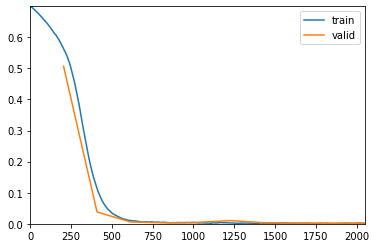

epoch,train_loss,valid_loss,accuracy,time
0,0.568125,0.498255,0.014003,00:01
1,0.122219,0.043514,0.006469,00:01
2,0.010436,0.006773,0.033257,00:01
3,0.004762,0.017244,0.012709,00:01
4,0.002069,0.007943,0.091857,00:01
5,0.003728,0.008035,0.514536,00:01
6,0.002404,0.008506,0.858219,00:01
7,0.001788,0.007389,0.673592,00:01
8,0.001581,0.004835,0.449543,00:01
9,0.001546,0.005883,0.494521,00:01


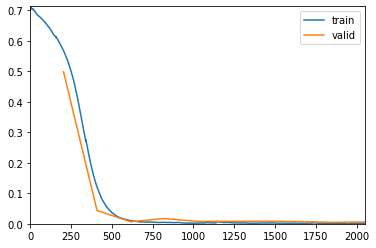

In [32]:
for train_idx, test_idx in sss.split(df_data.index, df_data[df_dep_var]):
    data_fold = (TabularList.from_df(df_data, path=dataPath, cont_names=cont_names, procs=procs)
                     .split_by_idxs(train_idx, test_idx)
                     .label_from_df(cols=df_dep_var)
                     .databunch())
    # create model and learn
    model = tabular_learner(data_fold, layers=[50, 20], metrics=accuracy, callback_fns=ShowGraph)
    model.fit_one_cycle(cyc_len=10) #
    model.save('{}.model'.format(os.path.basename(filepath)))

In [33]:
loss, acc = model.validate()
print('loss {}: accuracy: {:.2f}%'.format(loss, acc*100))

loss 0.005882912781089544: accuracy: 49.45%


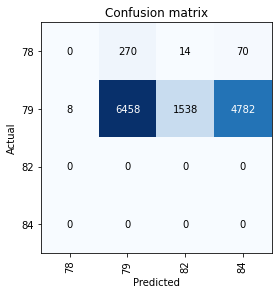

In [34]:
preds, y, losses = model.get_preds(with_loss=True)
interp = ClassificationInterpretation(model, preds, y, losses)
interp.plot_confusion_matrix()

In [37]:
# Choose your own filepath for arff file
filepath = 'CICDataSet-TOR/Scenario-A/TimeBasedFeatures-120s-TOR-NonTOR.arff'
raw_data = loadarff(filepath)

# Converting arff file into pandas dataframe
df_data = pd.DataFrame(raw_data[0])

# Now, you can perform pandas methods if it is easy enough for you
print(df_data['class1'].value_counts())
column_name = list(df_data.columns)
print(column_name)

b'NONTOR'    10782
b'TOR'         470
Name: class1, dtype: int64
['duration', 'total_fiat', 'total_biat', 'min_fiat', 'min_biat', 'max_fiat', 'max_biat', 'mean_fiat', 'mean_biat', 'flowPktsPerSecond', 'flowBytesPerSecond', 'min_flowiat', 'max_flowiat', 'mean_flowiat', 'std_flowiat', 'min_active', 'mean_active', 'max_active', 'std_active', 'min_idle', 'mean_idle', 'max_idle', 'std_idle', 'class1']


In [38]:
df_data

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1
0,117202678.0,17.0,4.0,35188437.0,35149142.0,4.742976e+05,5.578672e+05,2.502257e+06,2.693576e+06,3.916293,...,1.839548e+06,1363299.0,5.561680e+06,35334176.0,7.589073e+06,1079974.0,4.426667e+06,35137650.0,7.605741e+06,b'NONTOR'
1,119579137.0,16.0,4.0,35208950.0,35022877.0,5.108043e+05,5.410036e+05,2.582052e+06,2.634447e+06,3.821737,...,1.849452e+06,1443143.0,4.972742e+06,35280803.0,7.131588e+06,1065834.0,4.185795e+06,35022877.0,7.108954e+06,b'NONTOR'
2,90462788.0,20.0,5.0,24383019.0,24244301.0,9.812504e+05,1.145099e+06,3.866535e+06,4.125707e+06,1.912389,...,2.842532e+06,2757283.0,9.991859e+06,24613894.0,8.779228e+06,1297996.0,9.071855e+06,24244301.0,9.259661e+06,b'NONTOR'
3,65341087.0,18.0,5.0,26116331.0,25978548.0,6.873223e+05,7.503962e+05,3.213452e+06,3.322049e+06,2.815992,...,2.313499e+06,1566070.0,9.245735e+06,26194797.0,9.349672e+06,1197148.0,8.231822e+06,25978548.0,9.321698e+06,b'NONTOR'
4,119999180.0,29999272.0,29999277.0,30001029.0,30001305.0,3.000000e+07,3.000000e+07,8.268222e+02,1.154763e+03,0.075001,...,1.600000e+07,29999272.0,3.000000e+07,30001029.0,8.268222e+02,29944247.0,2.990000e+07,29944585.0,1.499153e+02,b'NONTOR'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11247,119995943.0,119995707.0,119995733.0,103.0,15.0,7.682500e+04,7.686000e+04,4.502653e+04,3.560704e+04,50.310034,...,2.242562e+04,-1.0,0.000000e+00,-1.0,0.000000e+00,-1.0,0.000000e+00,-1.0,0.000000e+00,b'TOR'
11248,119958872.0,119958644.0,119958872.0,36.0,14.0,7.693900e+04,7.550700e+04,4.620903e+04,3.602369e+04,49.416937,...,2.264742e+04,-1.0,0.000000e+00,-1.0,0.000000e+00,-1.0,0.000000e+00,-1.0,0.000000e+00,b'TOR'
11249,119933641.0,119931440.0,119933641.0,72.0,13.0,7.668800e+04,7.598000e+04,4.556666e+04,3.653172e+04,49.335616,...,2.302657e+04,-1.0,0.000000e+00,-1.0,0.000000e+00,-1.0,0.000000e+00,-1.0,0.000000e+00,b'TOR'
11250,119990715.0,119990521.0,119990414.0,44.0,14.0,7.710100e+04,7.680700e+04,4.529653e+04,3.684078e+04,49.237143,...,2.303008e+04,-1.0,0.000000e+00,-1.0,0.000000e+00,-1.0,0.000000e+00,-1.0,0.000000e+00,b'TOR'


epoch,train_loss,valid_loss,accuracy,time
0,0.686454,0.643619,0.112172,00:01
1,0.296870,0.120711,0.000444,00:01
2,0.039264,0.011311,0.001777,00:01
3,0.007044,0.003494,0.003554,00:01
4,0.002549,0.002075,0.002665,00:01
5,0.001572,0.001386,0.005331,00:01
6,0.002246,0.001269,0.030209,00:01
7,0.001010,0.000944,0.025877,00:01
8,0.000592,0.000946,0.018214,00:01
9,0.000831,0.000939,0.016215,00:01


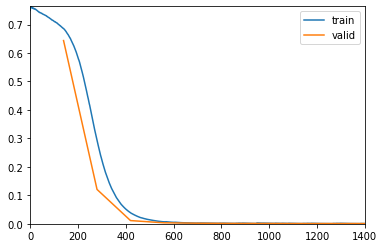

epoch,train_loss,valid_loss,accuracy,time
0,0.667607,0.622297,0.021657,00:01
1,0.298048,0.104647,0.000222,00:01
2,0.038831,0.010328,0.000777,00:01
3,0.006857,0.003979,0.000444,00:01
4,0.002467,0.002659,0.000444,00:01
5,0.001441,0.002368,0.018214,00:01
6,0.000859,0.001824,0.010662,00:01
7,0.000917,0.001726,0.076077,00:01
8,0.000659,0.001662,0.073856,00:01
9,0.000904,0.001691,0.067192,00:01


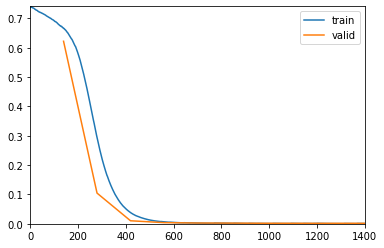

In [39]:
for train_idx, test_idx in sss.split(df_data.index, df_data[df_dep_var]):
    data_fold = (TabularList.from_df(df_data, path=dataPath, cont_names=cont_names, procs=procs)
                     .split_by_idxs(train_idx, test_idx)
                     .label_from_df(cols=df_dep_var)
                     .databunch())
    # create model and learn
    model = tabular_learner(data_fold, layers=[50, 20], metrics=accuracy, callback_fns=ShowGraph)
    model.fit_one_cycle(cyc_len=10) #
    model.save('{}.model'.format(os.path.basename(filepath)))

In [40]:
loss, acc = model.validate()
print('loss {}: accuracy: {:.2f}%'.format(loss, acc*100))

loss 0.001691016019321978: accuracy: 6.72%


In [ ]:
# total Tor samples
df
#df['label'].value_counts()

In [42]:
dep_var = 'label'
cat_names = ['Source Port', 'Destination Port', 'Protocol']
cont_names = list(set(df.columns) - set(cat_names) - set([dep_var]))

In [43]:
cont_names

['Fwd IAT Mean',
 'Flow IAT Mean',
 'Idle Min',
 'Flow IAT Min',
 'Flow IAT Max',
 'Flow Bytes/s',
 'Flow IAT Std',
 'Fwd IAT Max',
 'Bwd IAT Mean',
 'Bwd IAT Max',
 'Idle Mean',
 'Idle Max',
 'Fwd IAT Std',
 'Flow Duration',
 'Active Min',
 'Fwd IAT Min',
 'Active Max',
 'Bwd IAT Std',
 'Flow Packets/s',
 'Idle Std',
 'Active Std',
 'Bwd IAT Min',
 'Active Mean']

epoch,train_loss,valid_loss,accuracy,time
0,nan,nan,0.172338,01:01
1,nan,nan,0.172338,00:57
2,nan,nan,0.172338,00:57
3,nan,nan,0.172338,00:59
4,nan,nan,0.172338,00:56
5,nan,nan,0.172338,00:59
6,nan,nan,0.172338,00:57
7,nan,nan,0.172338,00:59
8,nan,nan,0.172338,00:59
9,nan,nan,0.172338,00:58


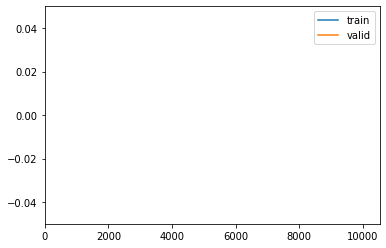

Exception: [Errno 20] Not a directory: 'CICDataSet-TOR/Scenario-A/TimeBasedFeatures-120s-TOR-NonTOR.arff/models'
Can't write to 'CICDataSet-TOR/Scenario-A/TimeBasedFeatures-120s-TOR-NonTOR.arff/models', set `learn.model_dir` attribute in Learner to a full libpath path that is writable

In [44]:
for train_idx, test_idx in sss.split(df.index, df[dep_var]):
    data_fold = (TabularList.from_df(df, path=filepath, cat_names=cat_names, cont_names=cont_names, procs=procs)
                     .split_by_idxs(train_idx, test_idx)
                     .label_from_df(cols=dep_var)
                     .databunch())
    # create model and learn
    model = tabular_learner(data_fold, layers=[50, 20], metrics=accuracy, callback_fns=ShowGraph)
    model.fit_one_cycle(cyc_len=10) #
    model.save('{}.model'.format(os.path.basename(csvFile)))